Assignment - 01

Please upload your Dataset file(CSV or Excel).


Saving HeightWeight.csv to HeightWeight.csv
(35, 2)
Height    float64
Weight    float64
dtype: object


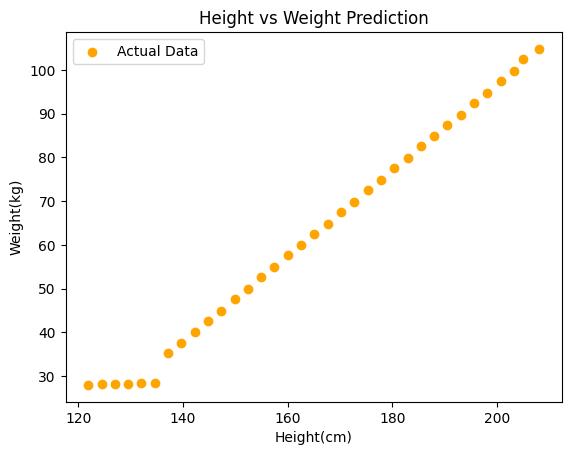

Coefficient :  [0.95927574]
Intercept :  -95.51920507434038


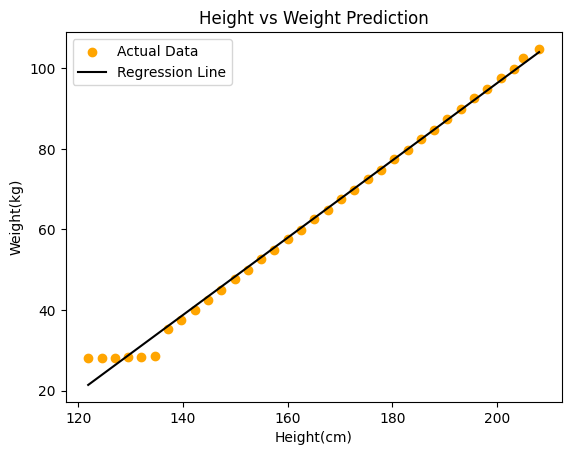


Model Evaluation:
Intercept: -95.51920507434038
Coefficient: 0.9592757406797103
Mean Squared Error: 0.08598317823041186
Root Mean Squared Error (RMSE): 0.2932288836905598
R-squared: 0.9995171886801006

Enter the height to predict weight: 160
Predicted weight for height 160.0 is 57.96


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

print("Please upload your Dataset file(CSV or Excel).")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
dataset = pd.read_csv(filename)

dataset.head()

dataset.tail()

print(dataset.shape)

print(dataset.dtypes)

dataset.isnull().sum()

X = dataset[['Height']]
y = dataset['Weight']

plt.scatter(X, y, color='orange', label='Actual Data')
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.legend()
plt.title('Height vs Weight Prediction')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficient : ", model.coef_)
print("Intercept : ", model.intercept_)

result = model.predict(X_test)

plt.scatter(X, y, color='orange', label='Actual Data')
plt.plot(X, model.predict(X), color='black', label='Regression Line')
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.legend()
plt.title("Height vs Weight Prediction")
plt.show()

mse = mean_squared_error(y_test, result)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, result)

print("\nModel Evaluation:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

user_height = float(input("\nEnter the height to predict weight: "))
predicted_weight = model.predict([[user_height]])
print(f"Predicted weight for height {user_height} is {predicted_weight[0]:.2f}")

Assignment - 02

Please upload your Dataset file.(CSV)


Saving mammals.csv to mammals (4).csv


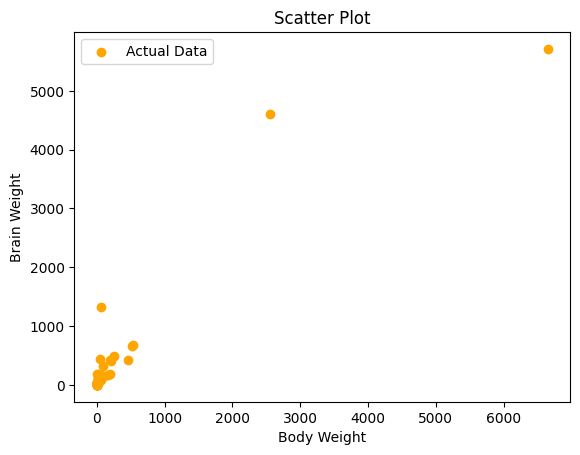

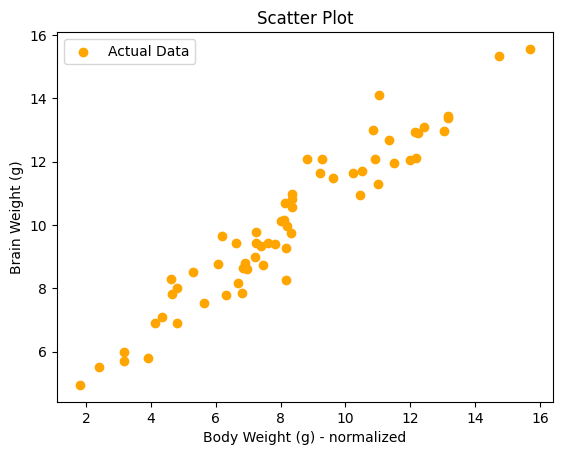

Average Mean Squared Error (MSE): 0.50
Average R-squared (R²): 0.91


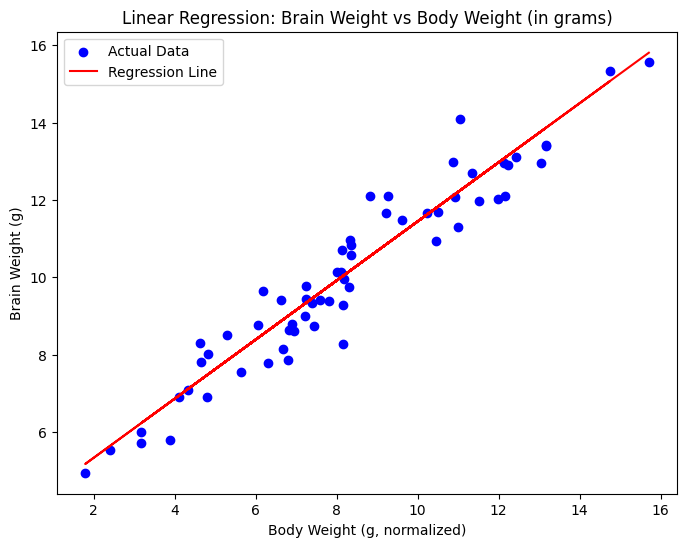

Predicted Brain Weight for Body Weight 0.2 kg: 2.58 kg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

print("Please upload your Dataset file.(CSV)")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
dataset = pd.read_csv(filename)

df = pd.DataFrame(dataset)

dataset.head()

dataset.tail()

dataset.shape

dataset.isnull().sum()

plt.scatter(df["body_wt"], df["brain_wt"], color='orange', label='Actual Data')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.legend()
plt.title('Scatter Plot')
plt.show()

df["Body_Weight_g"] = df["body_wt"] * 1000
df["Brain_Weight_g"] = df["brain_wt"] * 1000

df["Log_Body_Weight"] = np.log1p(df["Body_Weight_g"])
df["Log_Brain_Weight"] = np.log1p(df["Brain_Weight_g"])

X = df[["Log_Body_Weight"]]
y = df["Log_Brain_Weight"]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

plt.scatter(df["Log_Body_Weight"],df["Log_Brain_Weight"], color='orange', label='Actual Data')
plt.xlabel('Body Weight (g) - normalized')
plt.ylabel('Brain Weight (g)')
plt.legend()
plt.title('Scatter Plot')
plt.show()

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print(f"Average Mean Squared Error (MSE): {avg_mse:.2f}")
print(f"Average R-squared (R²): {avg_r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, model.predict(X_normalized), color="red", label="Regression Line")
plt.xlabel("Body Weight (g, normalized)")
plt.ylabel("Brain Weight (g)")
plt.title("Linear Regression: Brain Weight vs Body Weight (in grams)")
plt.legend()
plt.show()

body_weight = 0.2
body_weight_g = body_weight * 1000

log_single_body_weight = np.log1p(body_weight_g)

log_single_body_weight_normalized = scaler.transform([[log_single_body_weight]])

log_predicted_brain_weight = model.predict(log_single_body_weight_normalized)

predicted_brain_weight = np.expm1(log_predicted_brain_weight)

predicted_brain_weight_kg = predicted_brain_weight / 1000

print(f"Predicted Brain Weight for Body Weight {body_weight} kg: {predicted_brain_weight_kg[0]:.2f} kg")